In [1]:
# Let's import our dependencies. 
import pandas as pd
import requests
import json
import numpy as np
from scipy.stats import ttest_ind
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import the API key
from config import geoapify_key  

In [2]:
# Read our CSV file into pandas dataframe. 
miami_full_df = pd.read_csv('miami-housing_2016.csv')
miami_df = pd.read_csv('sample_miami_df.csv')
miami_df.head()
miami_full_df.count()

LATITUDE             13932
LONGITUDE            13932
PARCELNO             13932
SALE_PRC             13932
LND_SQFOOT           13932
TOT_LVG_AREA         13932
SPEC_FEAT_VAL        13932
RAIL_DIST            13932
OCEAN_DIST           13932
WATER_DIST           13932
CNTR_DIST            13932
SUBCNTR_DI           13932
HWY_DIST             13932
age                  13932
avno60plus           13932
month_sold           13932
structure_quality    13932
dtype: int64

In [3]:
print("\n----------- Calculate Mean of complete dataset -----------\n")
print(round(miami_full_df['SALE_PRC'].mean(),2))
 
print("\n----------- Calculate Median of complete dataset -----------\n")
print(miami_full_df['SALE_PRC'].median())
 
print("\n----------- Calculate Mode of complete dataset -----------\n")
print(miami_full_df['SALE_PRC'].mode())

print("\n----------- Calculate Mean of sample dataset -----------\n")
print(round(miami_df['SALE_PRC'].mean(),2))
 
print("\n----------- Calculate Median of sample dataset -----------\n")
print(miami_df['SALE_PRC'].median())
 
print("\n----------- Calculate Mode of sample dataset -----------\n")
print(miami_df['SALE_PRC'].mode())


----------- Calculate Mean of complete dataset -----------

399941.93

----------- Calculate Median of complete dataset -----------

310000.0

----------- Calculate Mode of complete dataset -----------

0    250000.0
dtype: float64

----------- Calculate Mean of sample dataset -----------

394621.26

----------- Calculate Median of sample dataset -----------

310200.0

----------- Calculate Mode of sample dataset -----------

0    250000.0
dtype: float64


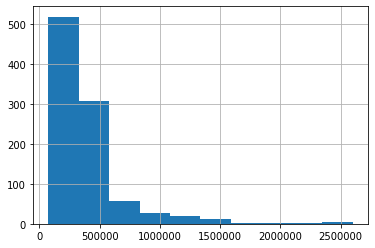

In [4]:
miami_df['SALE_PRC'].hist() #the data is skewed to right in sample

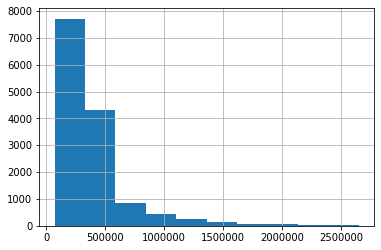

In [5]:
miami_full_df['SALE_PRC'].hist()   #the data is skewed to right in full dataset

In [6]:
# Calculate t-value
#If the p-value is less than 0.05, we reject the null hypothesis that there's no 
#difference between the means and conclude that a significant difference does exist.
#If the p-value is larger than 0.05, we cannot conclude that a significant difference exists. 

ttest_ind(miami_df['SALE_PRC'], miami_full_df['SALE_PRC'])

Ttest_indResult(statistic=-0.5017687117844195, pvalue=0.6158376483048207)

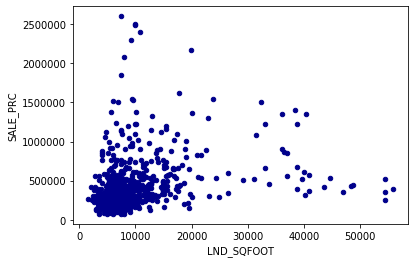

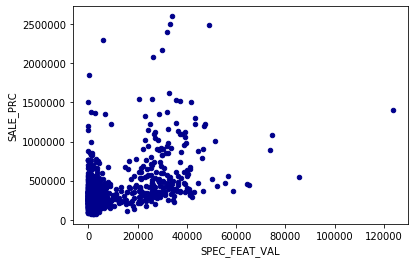

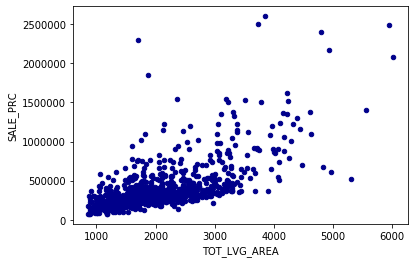

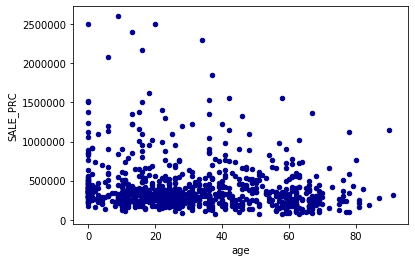

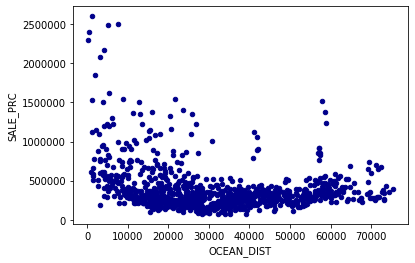

In [7]:
miami_df.plot.scatter(x='LND_SQFOOT',y='SALE_PRC',c='DarkBlue')
miami_df.plot.scatter(x='SPEC_FEAT_VAL',y='SALE_PRC',c='DarkBlue')
miami_df.plot.scatter(x='TOT_LVG_AREA',y='SALE_PRC',c='DarkBlue')
miami_df.plot.scatter(x='AGE OF THE HOUSE',y='SALE_PRC',c='DarkBlue')
miami_df.plot.scatter(x='OCEAN_DIST',y='SALE_PRC',c='DarkBlue')

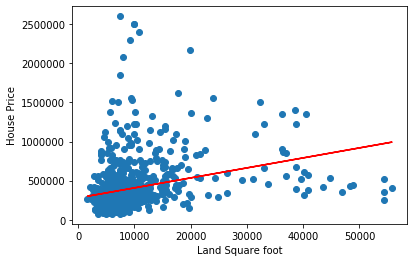

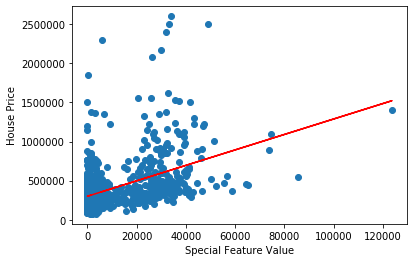

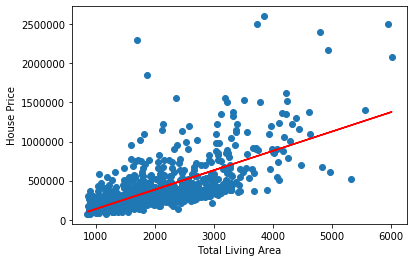

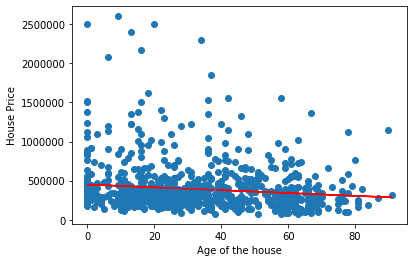

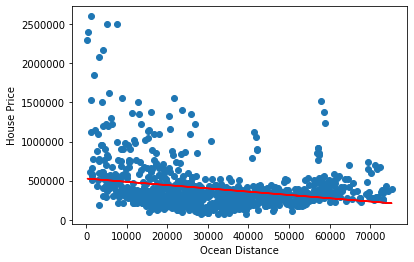

In [12]:
X = miami_df['LND_SQFOOT'].values.reshape(-1, 1)
Y = miami_df['SALE_PRC'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.xlabel('Land Square foot')
plt.ylabel('House Price')
plt.plot(X, Y_pred, color='red')
plt.show()

X = miami_df['SPEC_FEAT_VAL'].values.reshape(-1, 1)
Y = miami_df['SALE_PRC'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.xlabel('Special Feature Value')
plt.ylabel('House Price')
plt.plot(X, Y_pred, color='red')
plt.show()

X = miami_df['TOT_LVG_AREA'].values.reshape(-1, 1)
Y = miami_df['SALE_PRC'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.xlabel('Total Living Area')
plt.ylabel('House Price')
plt.plot(X, Y_pred, color='red')
plt.show()

X = miami_df['age'].values.reshape(-1, 1)
Y = miami_df['SALE_PRC'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.xlabel('Age of the house')
plt.ylabel('House Price')
plt.plot(X, Y_pred, color='red')
plt.show()

X = miami_df['OCEAN_DIST'].values.reshape(-1, 1)
Y = miami_df['SALE_PRC'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.xlabel('Ocean Distance')
plt.ylabel('House Price')
plt.plot(X, Y_pred, color='red')
plt.show()

In [17]:
#Miami_housing_sp_val = miami_df[['LND_SQFOOT','SALE_PRC']]
#Miami_housing_sp_val.corr()

corr_land_sqfoot1 = round(miami_df['LND_SQFOOT'].corr(miami_df['SALE_PRC']),3)
corr_land_spl_feat_val =  round(miami_df['SPEC_FEAT_VAL'].corr(miami_df['SALE_PRC']),3)
corr_land_tot_lvg_area = round(miami_df['TOT_LVG_AREA'].corr(miami_df['SALE_PRC']),3)
corr_land_age = round(miami_df['age'].corr(miami_df['SALE_PRC']),3)
corr_land_ocean_dist = round(miami_df['OCEAN_DIST'].corr( miami_df['SALE_PRC']),3)

print(f"Correlation between land square foot vs price : {corr_land_sqfoot1}")
print(f"Correlation between special feature value vs price : {corr_land_spl_feat_val}")
print(f"Correlation between total living area vs price : {corr_land_tot_lvg_area}")
print(f"Correlation between age of the house vs price : {corr_land_age}")
print(f"Correlation between ocean distance vs price : {corr_land_ocean_dist}")

Correlation between land square foot vs price : 0.297
Correlation between special feature value vs price : 0.46
Correlation between total living area vs price : 0.658
Correlation between age of the house vs price : -0.127
Correlation between ocean distance vs price : -0.246


In [13]:
#plt.savefig('linearregression')

<Figure size 432x288 with 0 Axes>

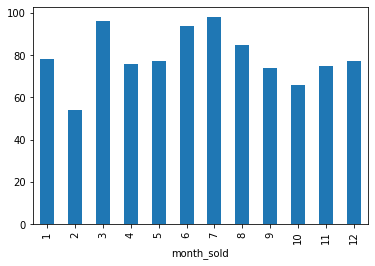

In [10]:

miami_months_df = miami_df.groupby(['month_sold'])['SALE_PRC'].count()
miami_months_df.plot.bar(x='month_sold',y='SALE_PRC')


In [11]:
#lines = miami_months_df.plot.line(x='month_sold', y='count')


# convert response to json
#places_data = response.json()

# Print the json (pretty printed)
#print(json.dumps(places_data, indent=4, sort_keys=True))
#small_df = df[['title', 'release_date',
